<a href="https://colab.research.google.com/github/icebreaker30/fluid_NN/blob/main/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D1%8C_%D0%B4%D0%BB%D1%8F_%D0%B3%D0%B8%D0%B4%D1%80%D0%BE%D0%B4%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import sys
import math
import matplotlib.pyplot as plt

In [2]:
# Функция скорости потока
def FluidFunc(x):
    return (ro*g*h/(4*mu*l) * (r0**2-x**2))
    

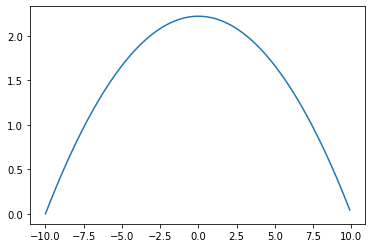

In [3]:
# В качестве жидкости возьмем воду и запишем ее свойства, указав геометрические размеры канала течения
pcenter = 0
prange = 10
step = 0.1
period = np.arange(pcenter-prange, pcenter+prange, step)
r0 = 10
ro = 1000
g = 9.8
mu = 9 *10**(-4)
d = 20
nu = 10**(-6)
v = 1
Lambda = 64 * nu / (v * d) # Формула Пуазеля
l = 3
h = Lambda * l * v**2 / (d * 2 *g) #Формула Дарси-Вейсбаха
# Тогда распределение скоростей в поперечном сечении канала будет выглядеть так
plt.plot(period, FluidFunc(period))
plt.show()


In [4]:
#Создадим нейросеть
class NN(object):
    
    def __init__(self, learning_rate=0.1, input_nodes=1, hidden_nodes=50, output_nodes=1):
        input_nodes+=1
        # Изначальные веса вводим как случайные значения(инициализация табличек весов)
        self.weights_0_1 = np.random.normal(0.0, hidden_nodes ** -0.5, (hidden_nodes, input_nodes))# Размерность (hidden_nodes, input_nodes)
        self.weights_1_2 = np.random.normal(0.0, output_nodes ** -0.5, (output_nodes, hidden_nodes))
        # Задаем функцию активации нейронов - сигмоиду
        self.sigmoid_mapper = np.vectorize(self.sigmoid)
        # Learning rate позволяет указать скорость обучения нейросети 
        self.learning_rate = np.array([learning_rate])
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def predict(self, inputs):
        # Прямой ход - т.е. производится конечный расчет значения нейросети с текущеми весами нейронов, которые будут подот настраиваться
        inputs = np.concatenate((inputs,[1]))
        inputs_1 = np.dot(self.weights_0_1, inputs) # Делаем перемножения матриц весов и матриц значений нейронов предыдущего слоя
        outputs_1 = self.sigmoid_mapper(inputs_1)
        
        inputs_2 = np.dot(self.weights_1_2, outputs_1)
        
        outputs_2 = inputs_2# Не применяем функцию активации потому, что хотим получить численное значение, а не булевое
        return outputs_2
    
    def train(self, inputs, expected_predict):
        # Обратный ход - оно же обратное распостранение ошибки, на котором производится корректировка весов в соответствии со значением ошибки между предсказанным значением и реальным
        inputs = np.concatenate((inputs,[1]))        
        inputs_1 = np.dot(self.weights_0_1, inputs)
        outputs_1 = self.sigmoid_mapper(inputs_1)
        
        inputs_2 = np.dot(self.weights_1_2, outputs_1)
        
        outputs_2 = inputs_2
        actual_predict = outputs_2[0]
        
        error_layer_2 = np.array([actual_predict - expected_predict]) # Функция ошибки
        gradient_layer_2 = 1 # Во втором слое нет активационной функции, а потому производная будет 1
        weights_delta_layer_2 = error_layer_2 * gradient_layer_2  # Идем обратно и помножаем градиент на ошибку предсказания
        self.weights_1_2 -= (np.dot(weights_delta_layer_2, outputs_1.reshape(1, len(outputs_1)))) * self.learning_rate# Обновляем веса вычитая градиент
        
        error_layer_1 = weights_delta_layer_2 * self.weights_1_2
        gradient_layer_1 = outputs_1 * (1 - outputs_1) # Здесь активационная функция сигмоида и производная от нее соответственная
        weights_delta_layer_1 = error_layer_1 * gradient_layer_1
        self.weights_0_1 -= np.dot(inputs.reshape(len(inputs), 1), weights_delta_layer_1).T  * self.learning_rate# Обновляем веса вычитая градиент
        

In [5]:
#Создаем экземпляр нейросети
lr=0.00005
myNN=NN(learning_rate=lr, input_nodes=1, hidden_nodes=50, output_nodes=1)

In [6]:
print(myNN.weights_1_2)

[[-1.00002352  0.13348101 -0.50820587  0.52781098  0.20465836  0.75537842
   0.35779227 -1.57728404 -0.54537726 -0.1834468  -0.5123637  -0.19213207
   0.58258324 -1.21807641  1.76389396  0.20711     0.11795013  0.34159421
   0.67383627  0.01766012  0.80264052 -1.74914702 -0.04240296 -0.61753214
  -0.23825352 -0.66030378  0.15314195 -0.17233636 -0.09079862  0.85801506
   0.82105807  1.17733897  0.35298119  0.41826532 -1.57745708 -1.20600623
  -0.14201629 -0.65948192  1.17294725  1.09371003 -1.82835156  0.35010756
   0.84144528  0.40794561 -0.00458922  0.15452061 -0.14126168  0.31193453
  -1.73612398  0.08244492]]


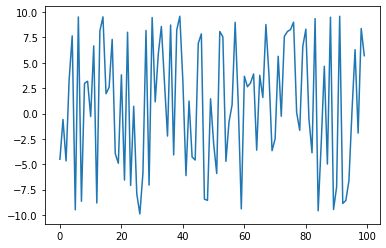

In [7]:
set_count = 100
rand_set = np.random.random(set_count)*2*prange-prange+pcenter
plt.plot(rand_set)

In [8]:
#Функция обучения
def Train():
    rand_set = np.random.random(set_count)*2*prange-prange+pcenter
    for x in range(0, set_count-1):
        myNN.train([rand_set[x]], FluidFunc(rand_set[x]))

In [9]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

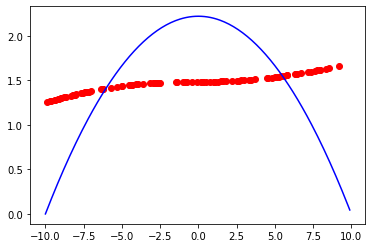

0.3743342346718756


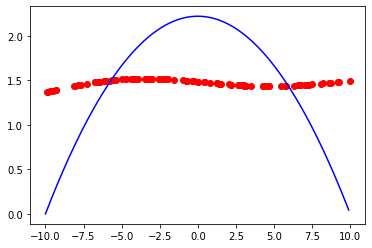

0.40408343541203634


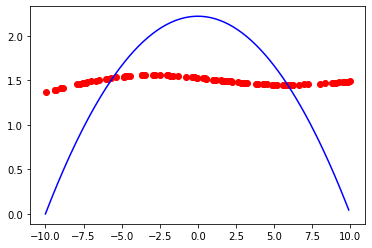

0.4354480824510095


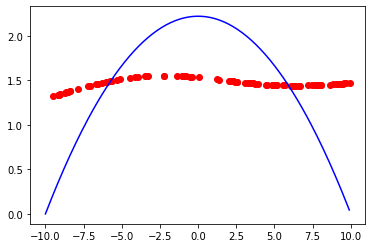

0.39003160641282525


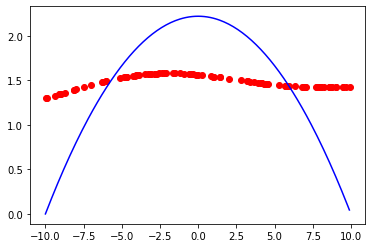

0.37229371005570344


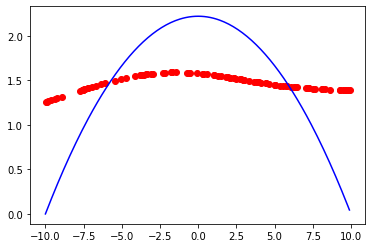

0.36911298114888264


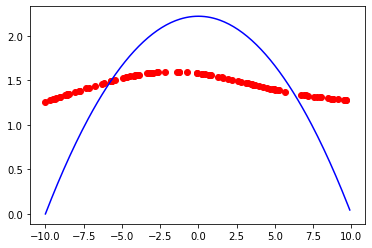

0.34152015468550934


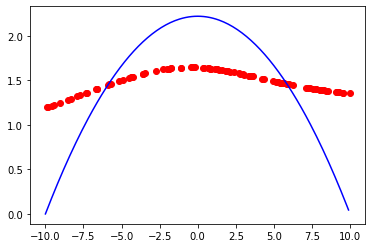

0.3117607811644129


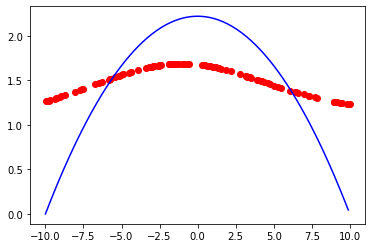

0.2919468522987754


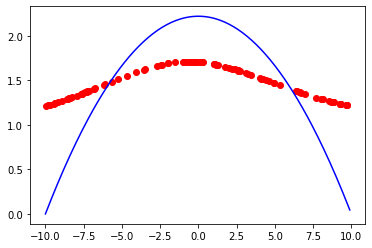

0.329927742852303


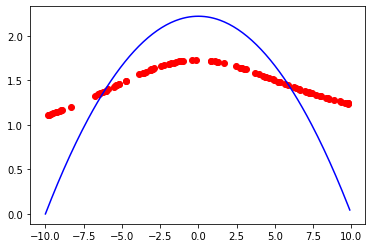

0.2693372579812219


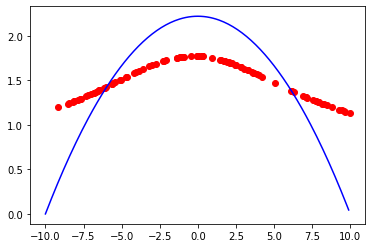

0.17967517408990333


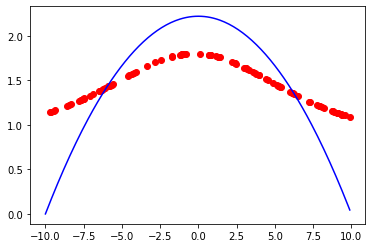

0.20546090509028697


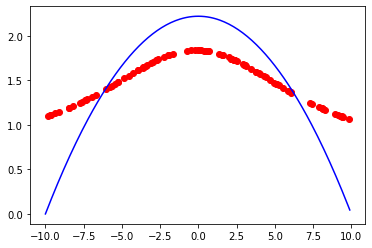

0.17874873556763482


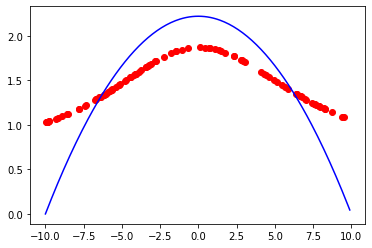

0.16565841557608751


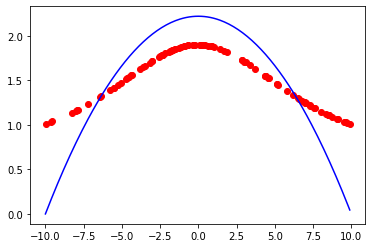

0.1406744564459869


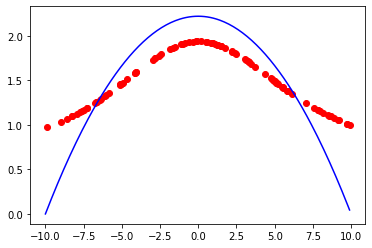

0.11411821441156482


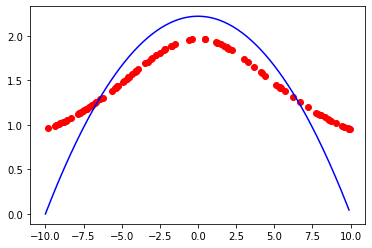

0.13553273674696986


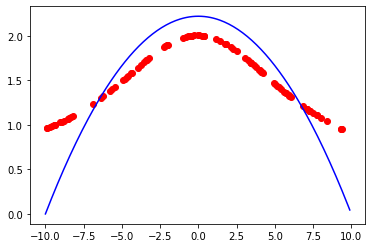

0.11551671229041915


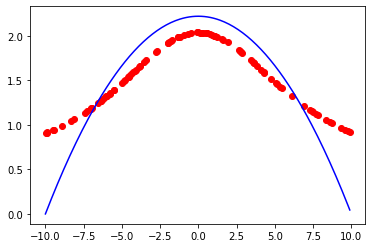

0.09895476185569471


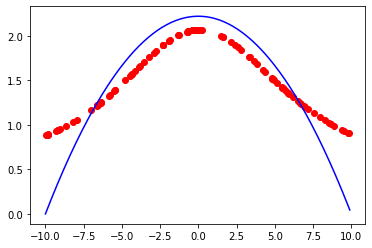

0.10398810678336153


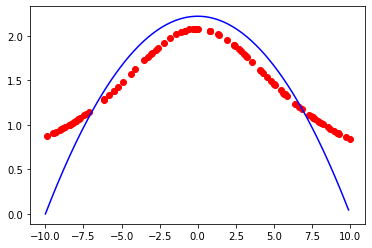

0.0909074795498835


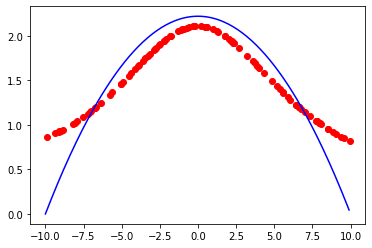

0.0655049542283277


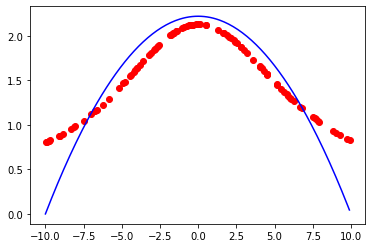

0.07651340647486779


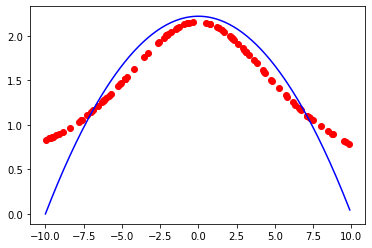

0.07767899391041869


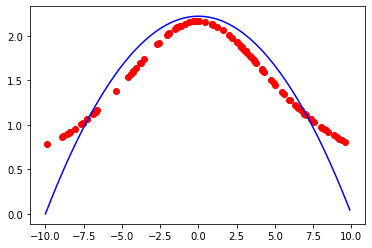

0.04547153974030684


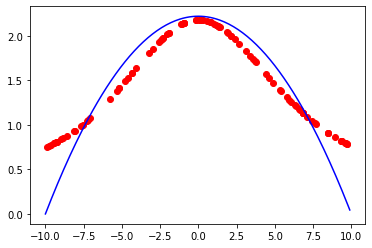

0.07306723785744769


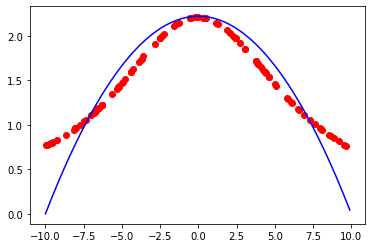

0.06085193678041015


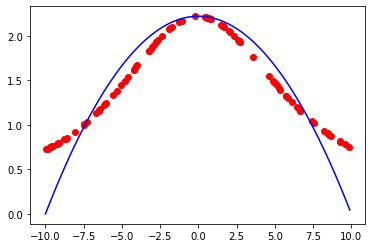

0.06939577561098366


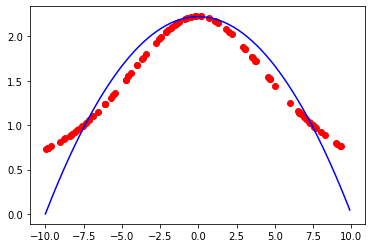

0.048187054754188934


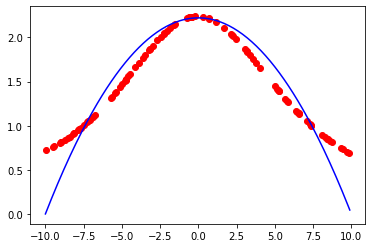

0.0469806993216556


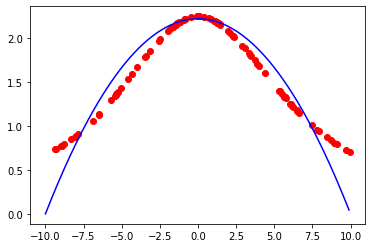

0.03276678552187961


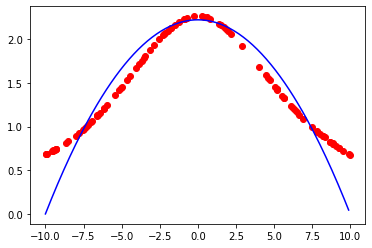

0.0653020290532204


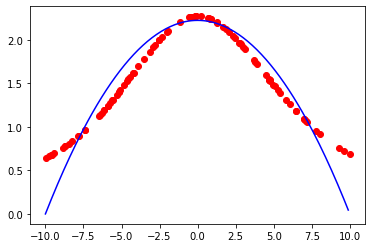

0.04361562568509993


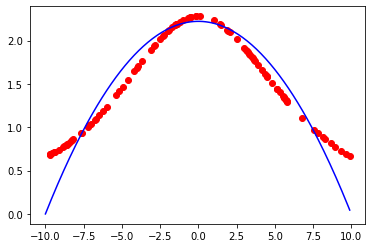

0.04487348131696717


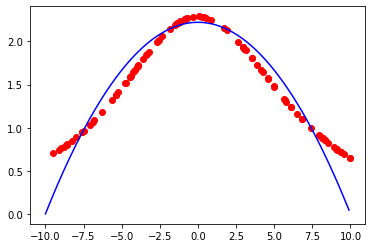

0.0408194011917772


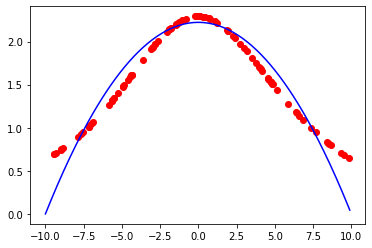

0.03186876590328159


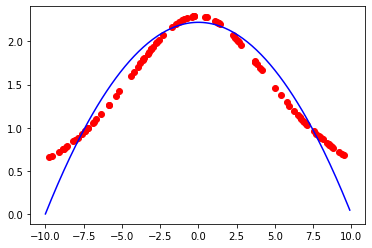

0.028260583945257593


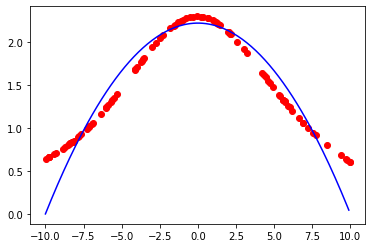

0.04930676910507763


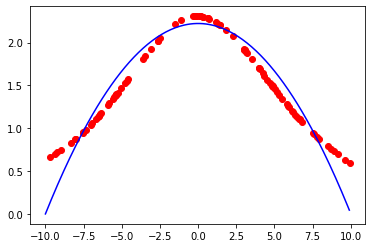

0.03211596997239385


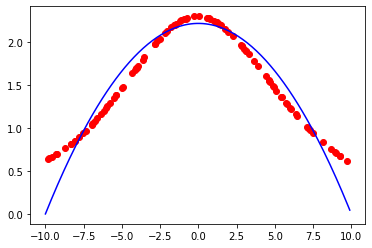

0.0326237975341832


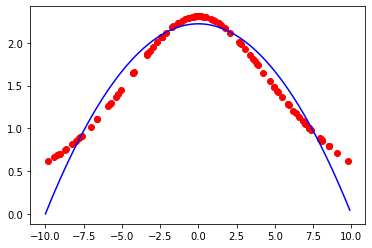

0.024831780947314547


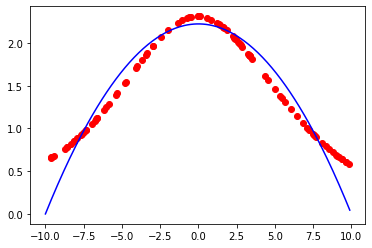

0.03310438406786163


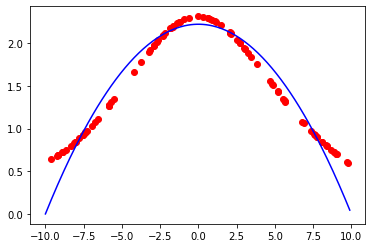

0.026405894132694382


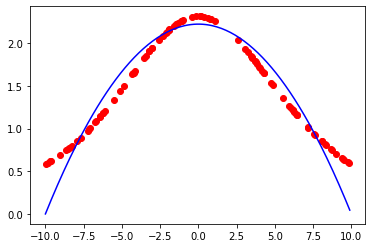

0.036205708456015624


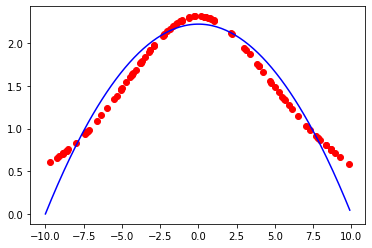

0.025007662587108927


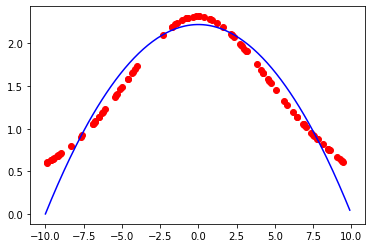

0.0400939252689437


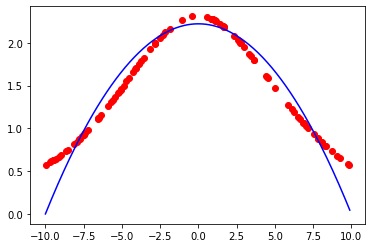

0.03237905442881145


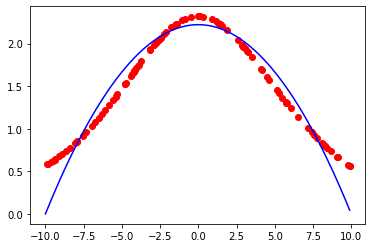

0.03530776800211466


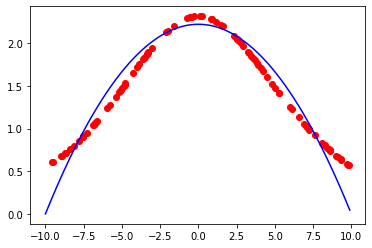

0.028760154269202406


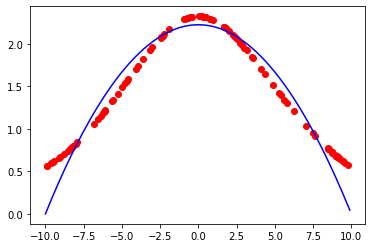

0.038210933517335524


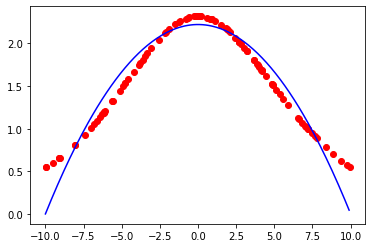

0.028596089363183412


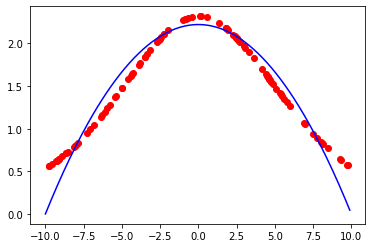

0.029666797419876594


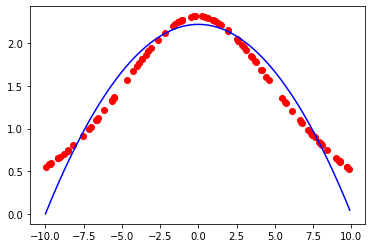

0.033465363849664934


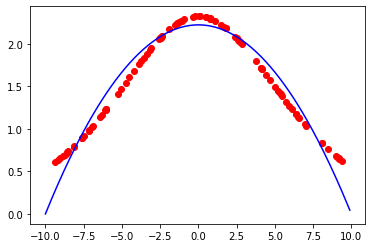

0.01915445461020566


KeyboardInterrupt: ignored

In [10]:
epochs = 100 # Полный проход туда и обратно
plt.ion()
for e in range(epochs):
    for tr in range(100):
        Train()
    plt.clf()
    plt.plot(period, FluidFunc(period), 'blue')
    rand_set = np.random.random(set_count)*2*prange-prange+pcenter
    result_set=np.zeros(100)
    MSE=0
    for x in range(0, set_count-1):
        result_set[x] = myNN.predict([rand_set[x]])
        MSE+= (FluidFunc(rand_set[x]) - result_set[x])**2
        plt.scatter(rand_set[x], result_set[x], c='red')
    plt.pause(1)    
    print(MSE/set_count)

In [ ]:
myNN.predict([9])

array([0.54435039])